# Exploratory Analysis(탐색적 분석)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import seaborn as sns
import numpy as np              # linear algebra
import os                       # accessing directory structure
import pandas as pd             # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from utils.utils import plotPerColumnDistribution, plotCorrelationMatrix, plotScatterMatrix

In [3]:
data_base_path = './data'

test_data_path = os.path.join(data_base_path, 'Test.csv')
train_data_path = os.path.join(data_base_path, 'Train.csv')
submit_path = os.path.join(data_base_path, 'Sample_submission.csv')



In [4]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Sample_submission.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
submit_data = pd.read_csv(submit_path, delimiter=',', nrows = nRowsRead)
submit_data.dataframeName = 'Sample_submission.csv'
nRow, nCol = submit_data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 756 rows and 1 columns


In [5]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Test.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
test_data = pd.read_csv(test_data_path, delimiter=',', nrows = nRowsRead)
test_data.dataframeName = 'Test.csv'
nRow, nCol = test_data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 756 rows and 1558 columns


In [6]:
# Test.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
train_data = pd.read_csv(train_data_path, delimiter=',', nrows = nRowsRead)
train_data.dataframeName = 'Train.csv'
nRow, nCol = train_data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 1559 columns


In [7]:
plotPerColumnDistribution(submit_data, 10, 5)

<Figure size 2400x512 with 0 Axes>

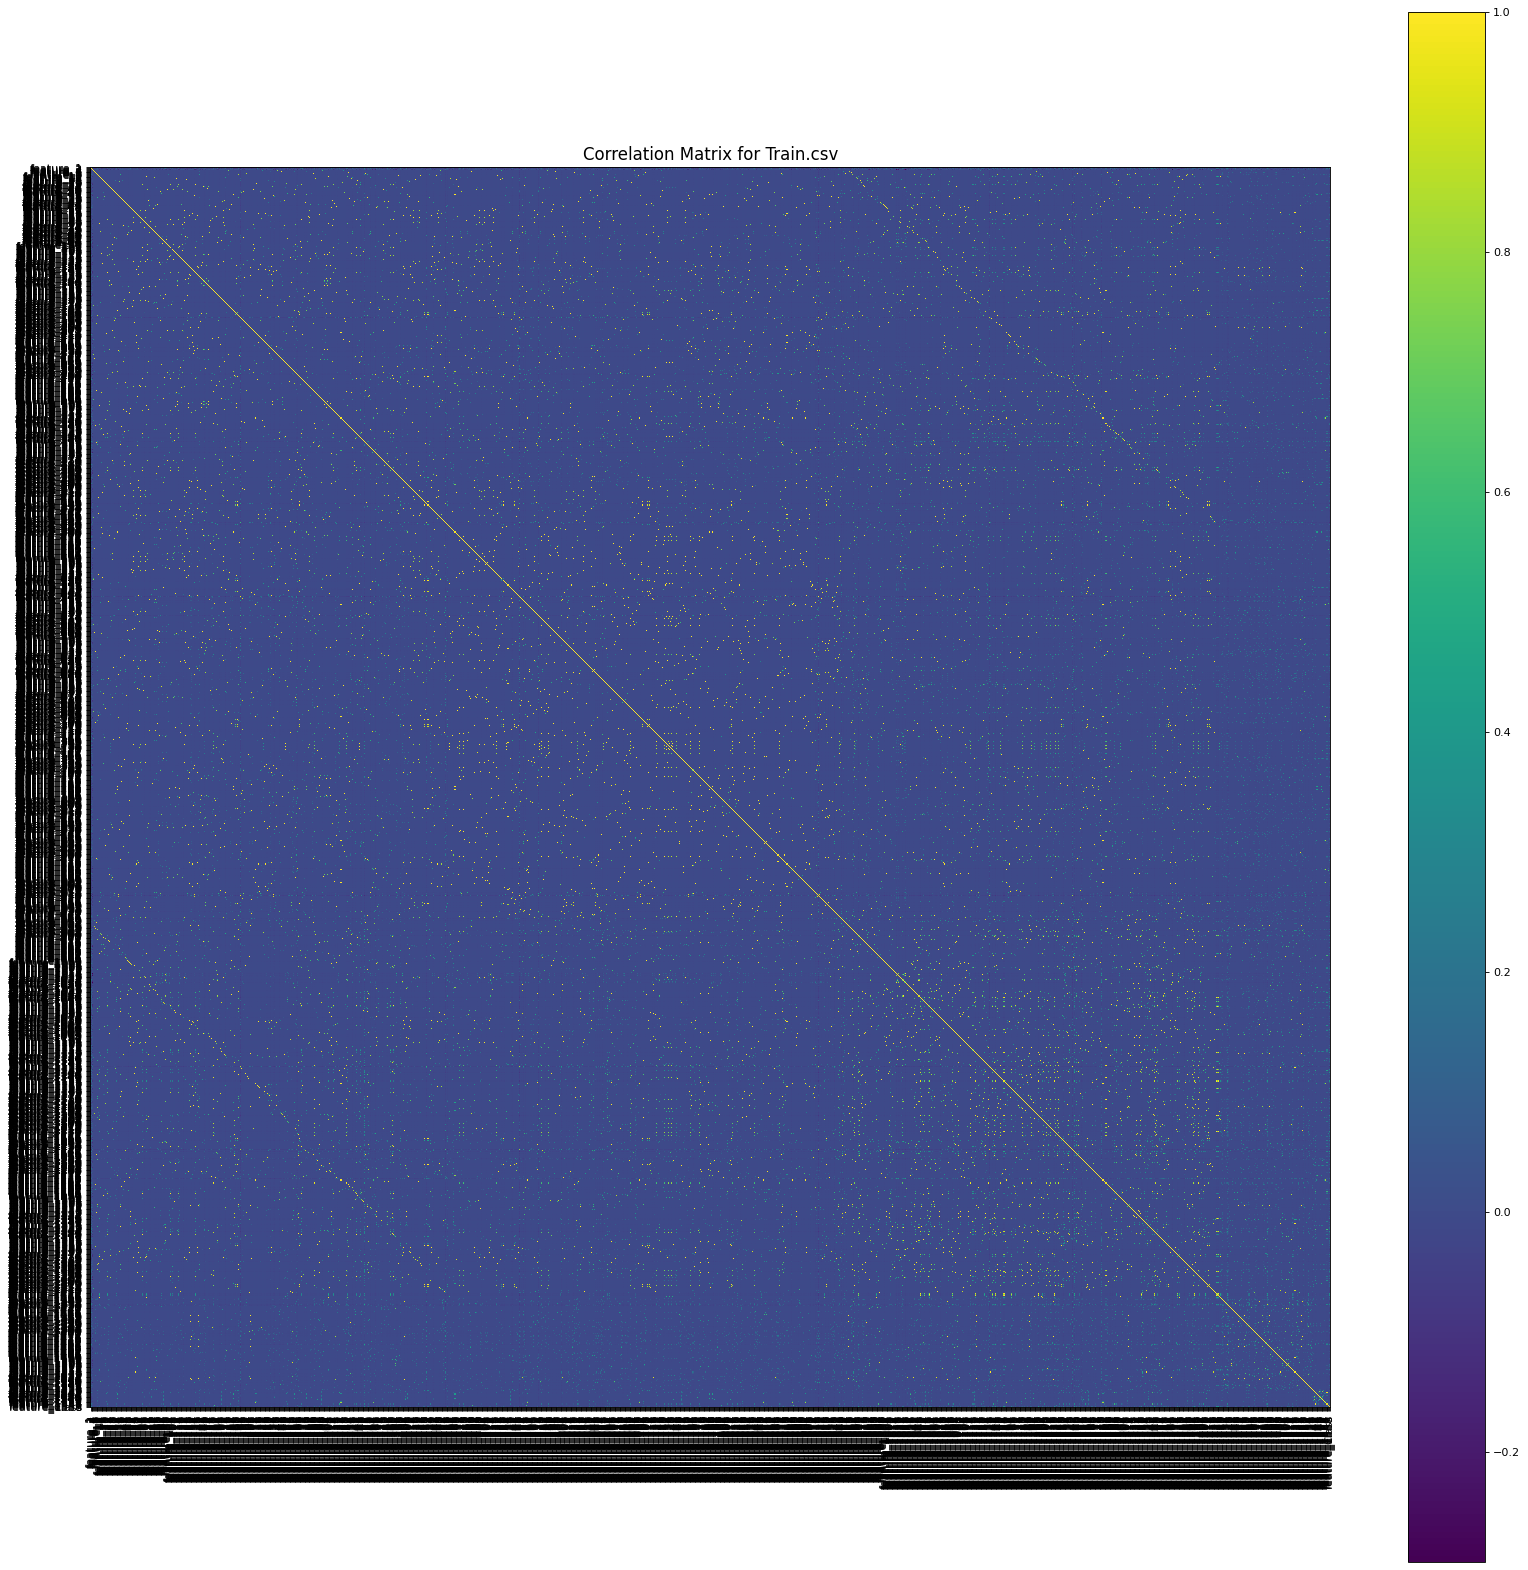

In [8]:
# NaN이 있는 컬럼은 제거 
plotCorrelationMatrix(train_data)

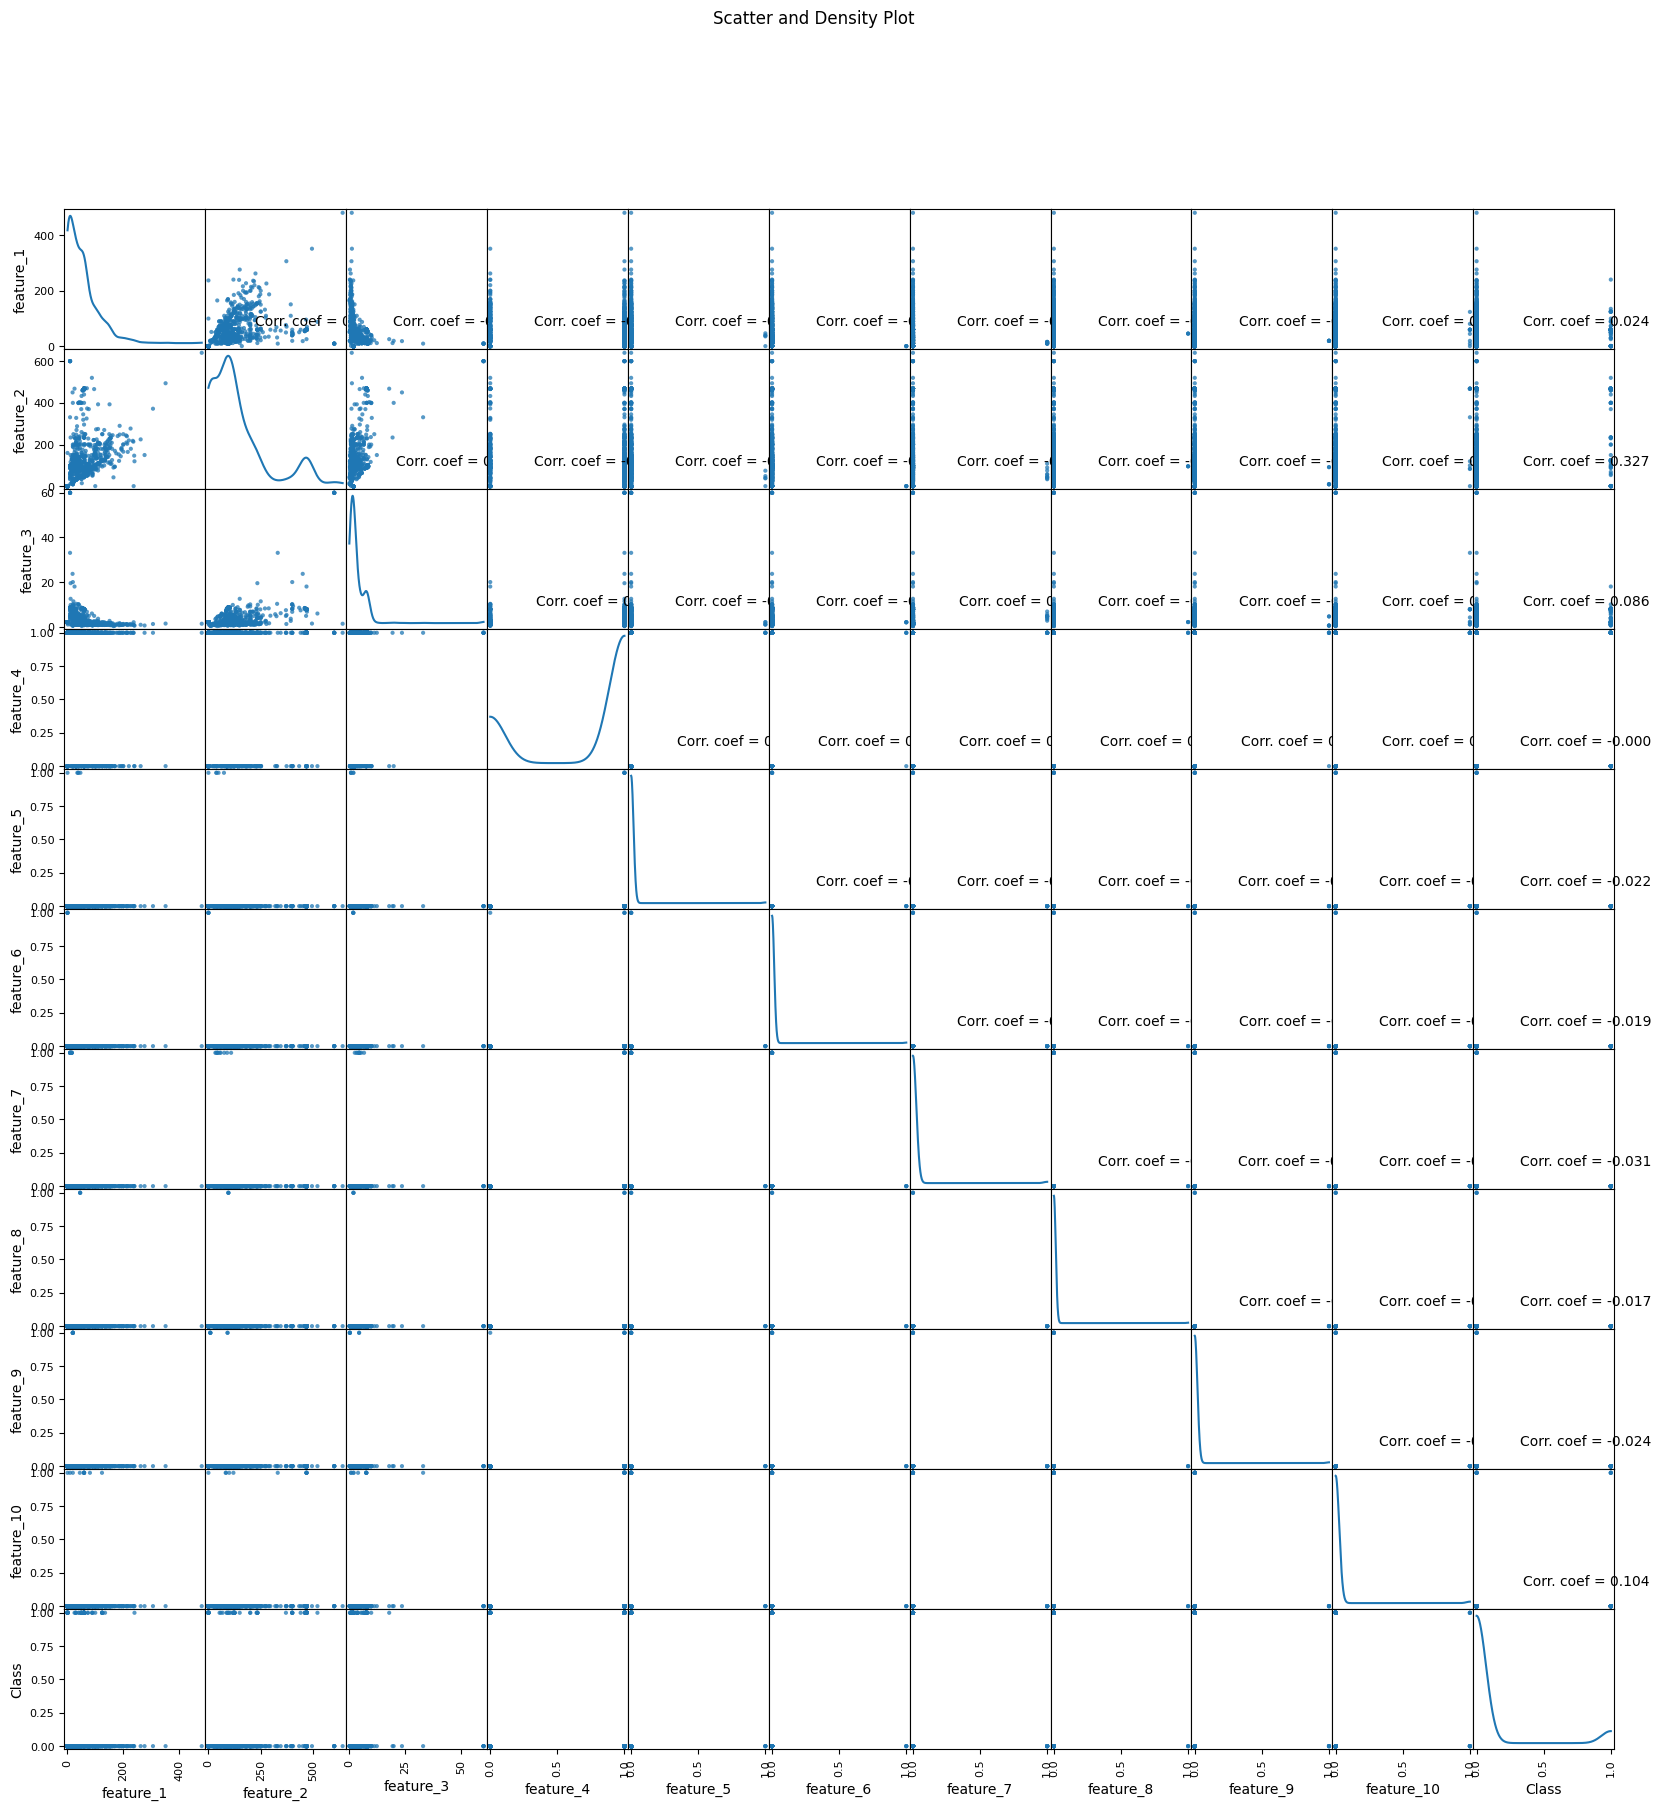

In [9]:
# numerical columns만 뽑아서 관계 확인 
plotScatterMatrix(train_data,between=[0,10])

In [10]:
def plotClassScatterMatrix(df, between=[0,10], plotSize=5, textSize=10):
    df = df.select_dtypes(include=[np.number])  # 숫자형 열만 선택
    df = df.dropna(axis=1)  # NaN 값이 있는 열 제거
    df = df[[col for col in df if df[col].nunique() > 1]]  # 고유값이 하나인 열 제거
    columnNames = list(df)
    
    # 선택된 범위의 열만 선택
    columnNames = columnNames[between[0]:between[1]]
    if 'Class' not in columnNames:
        columnNames.append('Class')  # 'Class' 열 추가
    
    df = df[columnNames]
    
    # 산점도들을 하나의 행으로 이어 붙이기
    num_plots = len(columnNames) - 1
    fig, axes = plt.subplots(1, num_plots, figsize=(plotSize * num_plots, plotSize))
    
    for i, col in enumerate(columnNames[:-1]):  # 'Class' 열 제외한 모든 열에 대해 반복
        axes[i].scatter(df[col], df['Class'], alpha=0.75)
        axes[i].set_xlabel(col, fontsize=textSize)
        axes[i].set_ylabel('Class', fontsize=textSize)
        axes[i].set_title(f'{col} vs Class', fontsize=textSize)
    
    plt.tight_layout()
    plt.show()

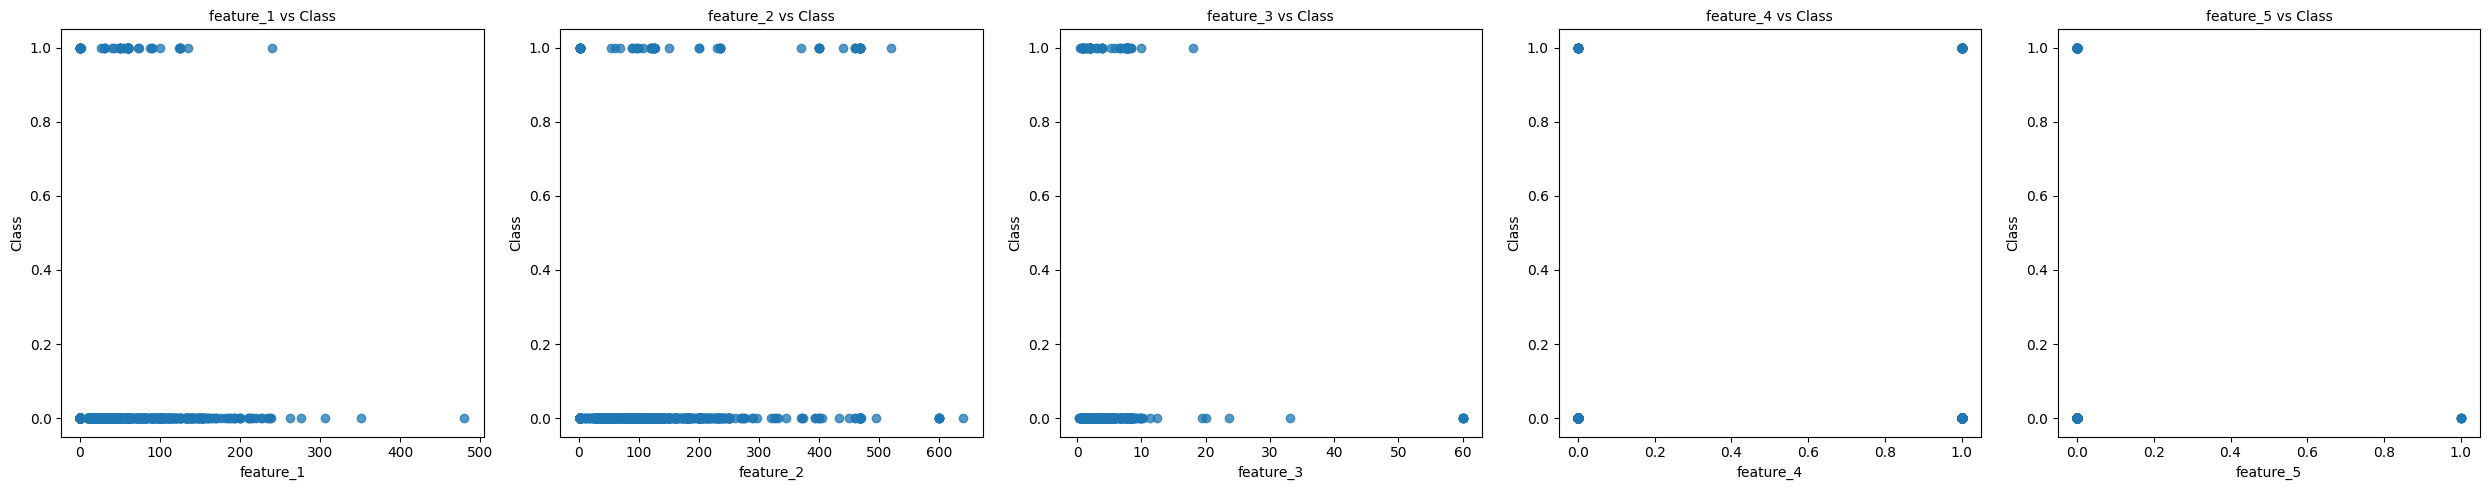

In [11]:
plotClassScatterMatrix(train_data,between=[0,5])

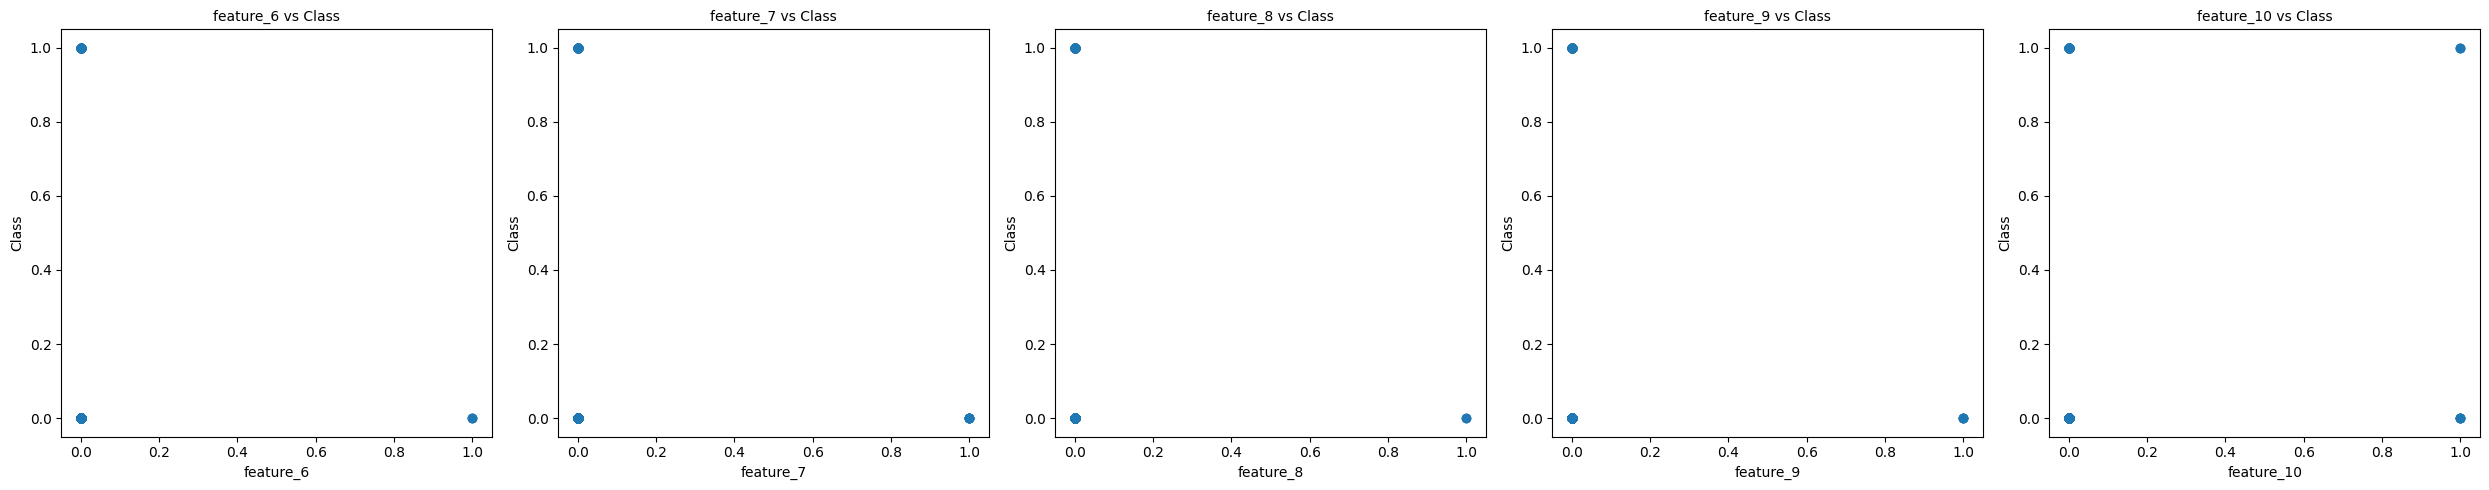

In [12]:
plotClassScatterMatrix(train_data,between=[5,10])

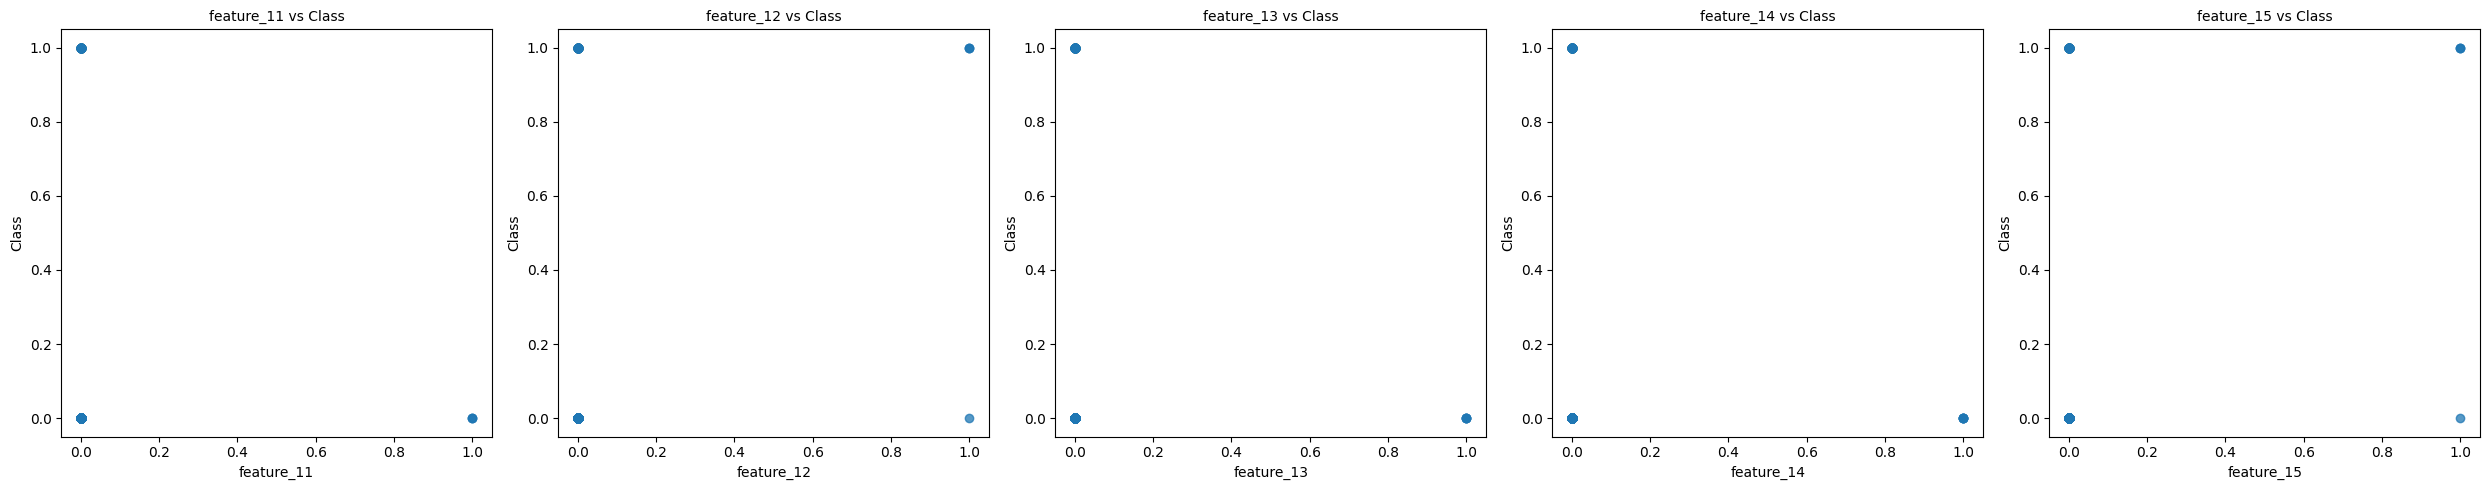

In [13]:
plotClassScatterMatrix(train_data,between=[10,15])

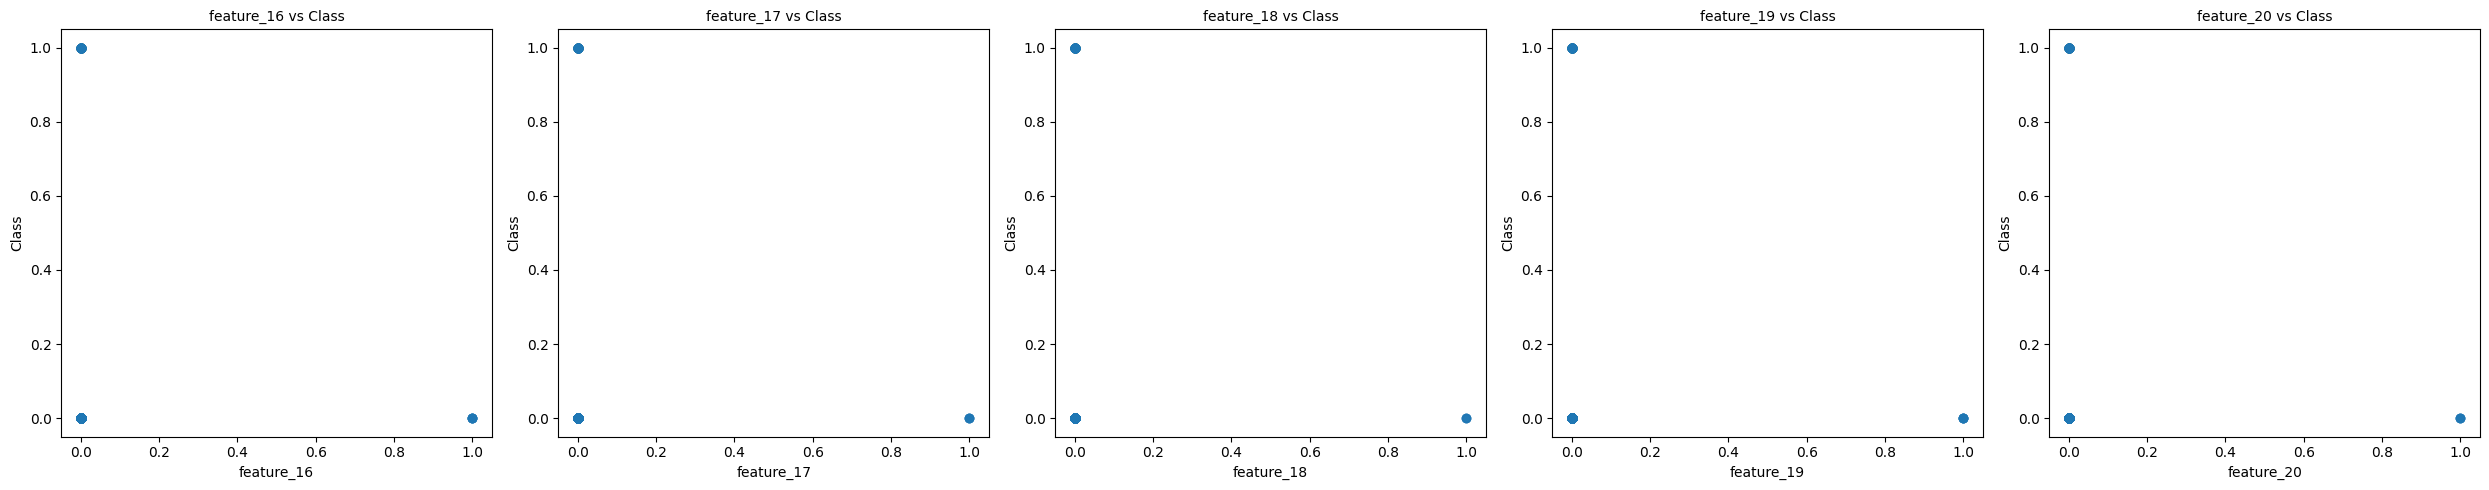

In [14]:
plotClassScatterMatrix(train_data,between=[15,20])

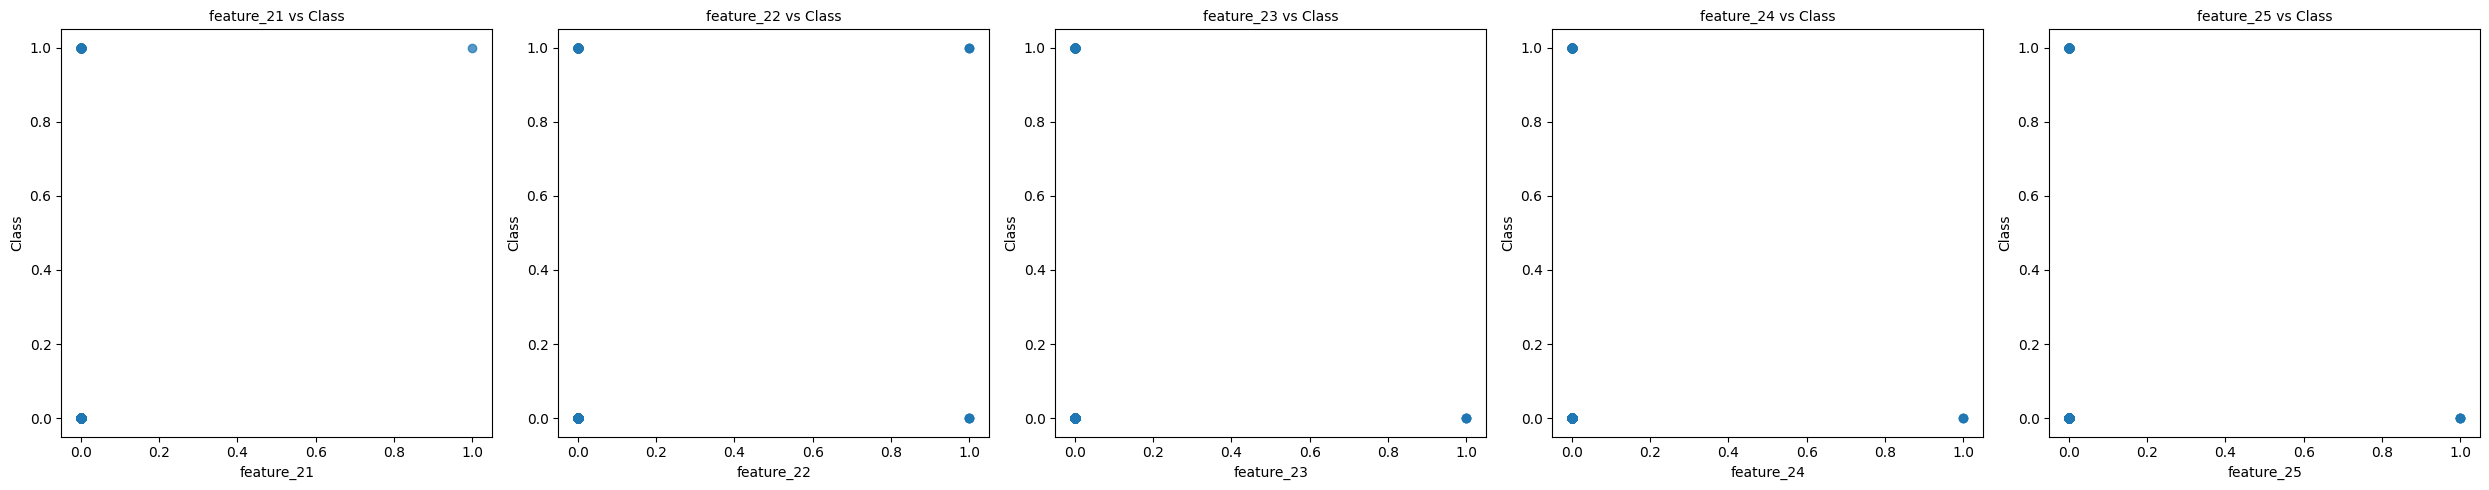

In [15]:
plotClassScatterMatrix(train_data,between=[20,25])

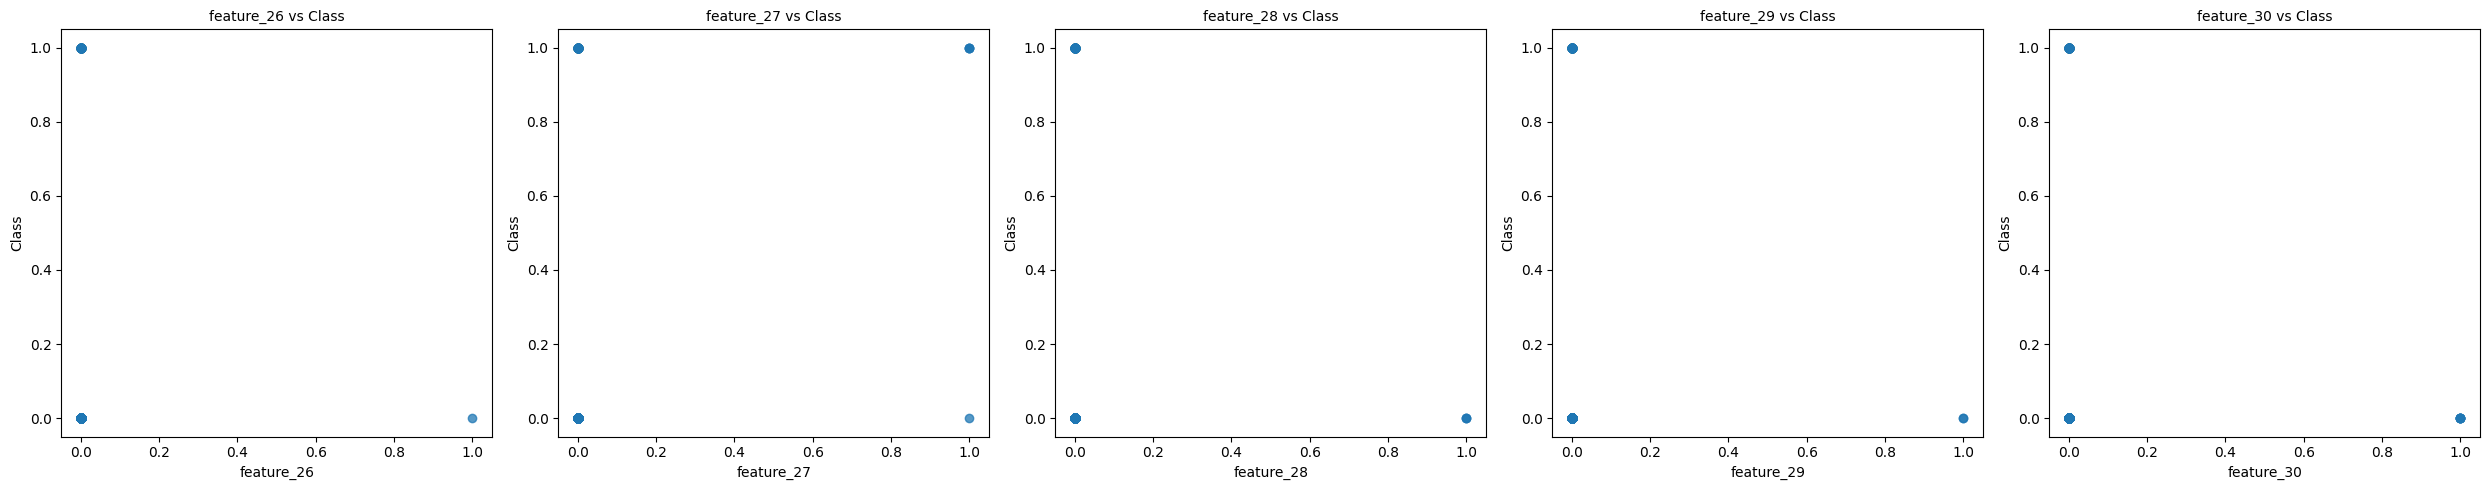

In [16]:
plotClassScatterMatrix(train_data,between=[25,30])

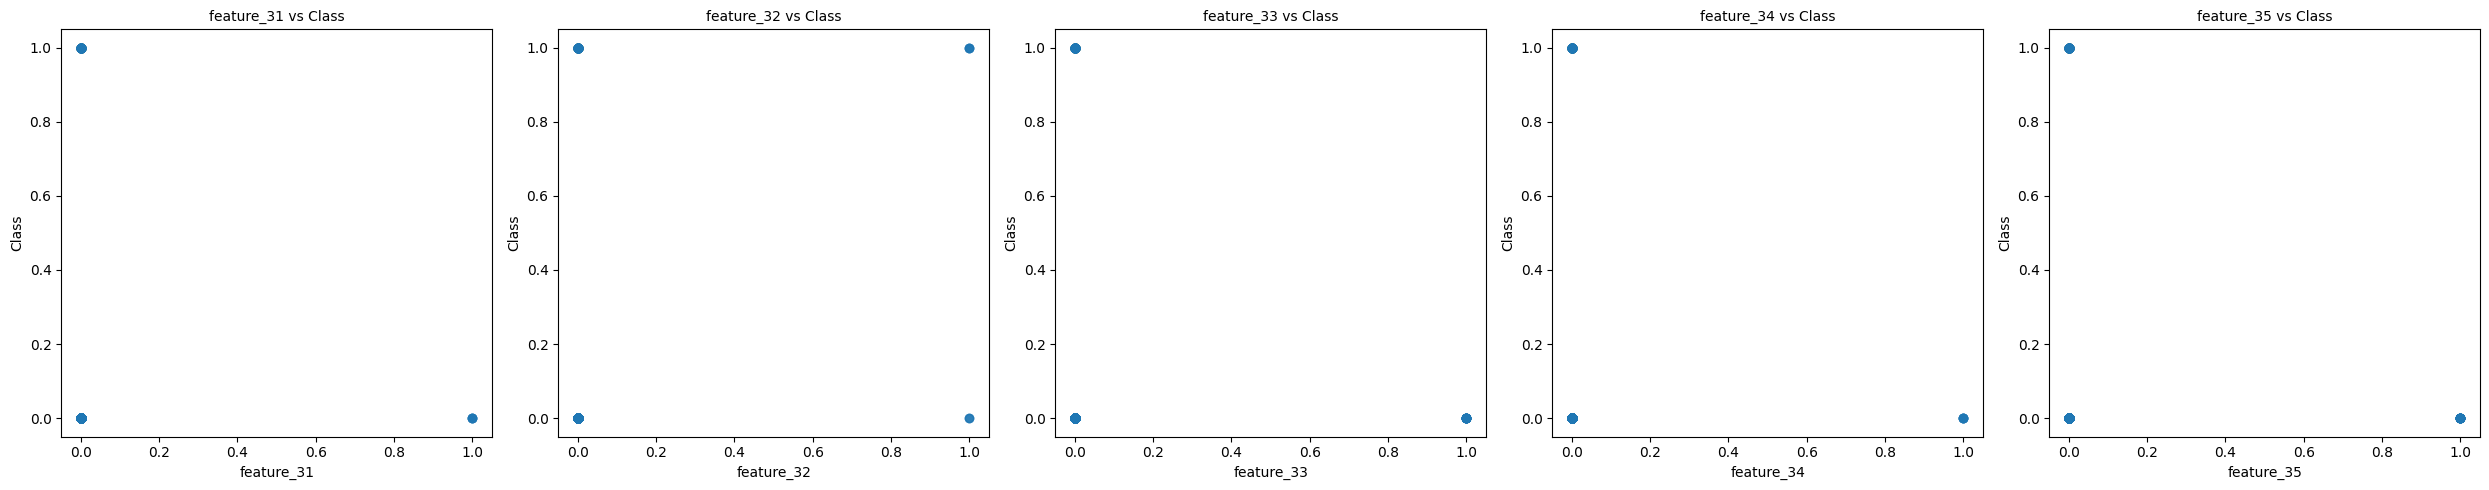

In [17]:
plotClassScatterMatrix(train_data,between=[30,35])

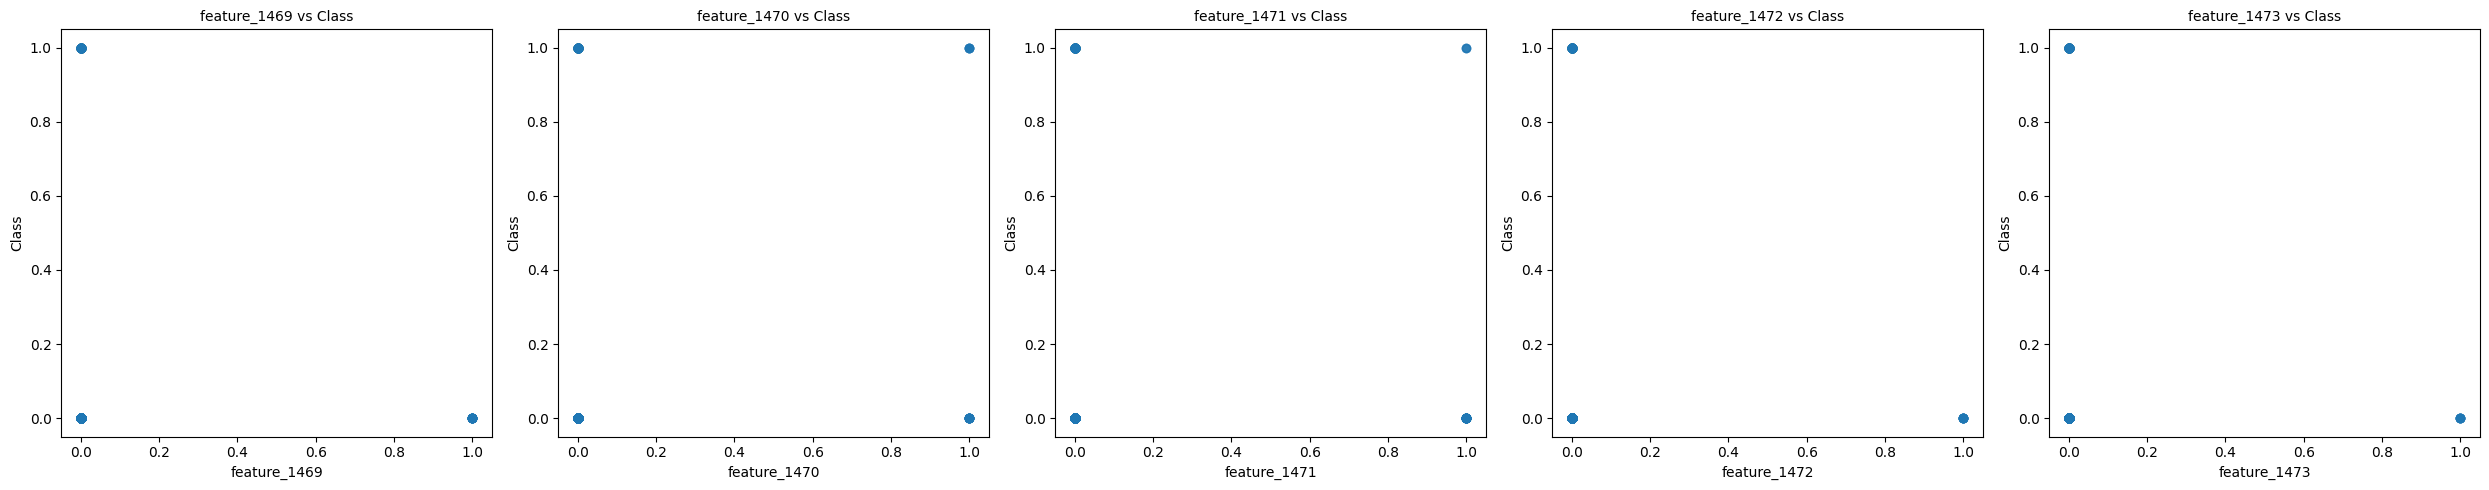

In [18]:
plotClassScatterMatrix(train_data,between=[1400,1405])

In [19]:
train_data['feature_1000'].value_counts()

feature_1000
0    996
1      4
Name: count, dtype: int64

거의 범주형 데이터, 이진 feature, 0 아님 1인 feature라는것을 알 수 있음 

In [20]:
# 0과 1의 값만 갖는 열을 찾기
binary_columns = train_data.columns[train_data.apply(lambda col: set(col) <= {0, 1})]


print("0과 1의 값만 갖는 열들:\n", binary_columns)

0과 1의 값만 갖는 열들:
 Index(['feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13',
       ...
       'feature_1550', 'feature_1551', 'feature_1552', 'feature_1553',
       'feature_1554', 'feature_1555', 'feature_1556', 'feature_1557',
       'feature_1558', 'Class'],
      dtype='object', length=1556)


In [21]:
non_binary_columns = train_data.columns.difference(binary_columns)

non_binary_columns

Index(['feature_1', 'feature_2', 'feature_3'], dtype='object')

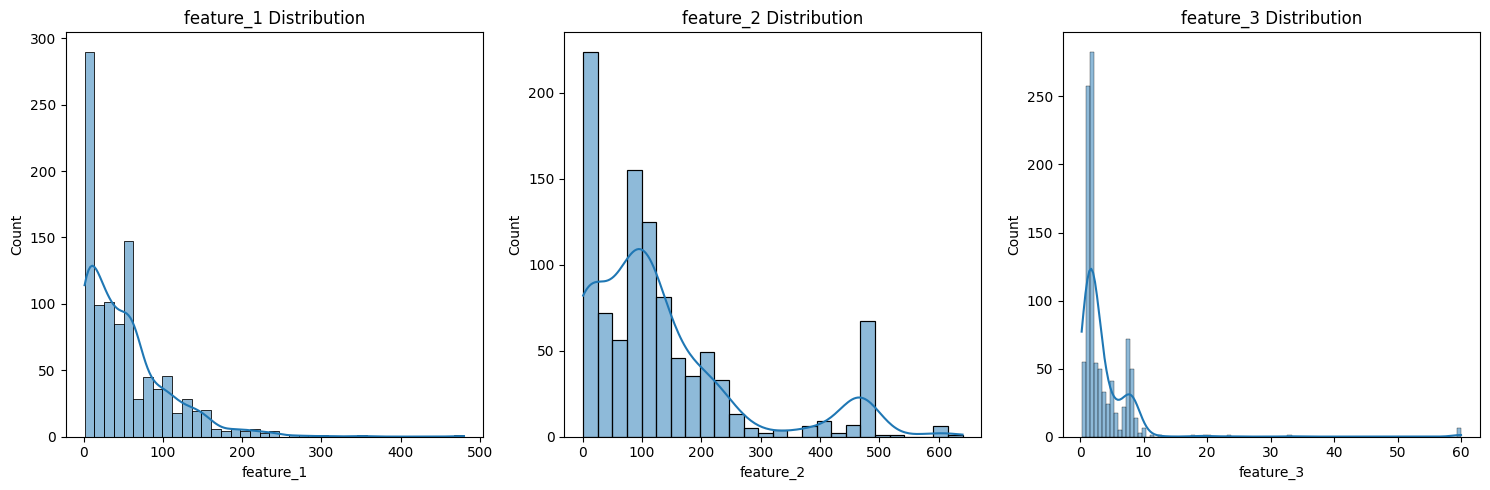

In [22]:
# 서브플롯 설정: 1행 3열
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(non_binary_columns):
    # 첫 번째 Feature의 분포
    sns.histplot(train_data[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'{feature} Distribution')

# 레이아웃 조정
plt.tight_layout()
plt.show()

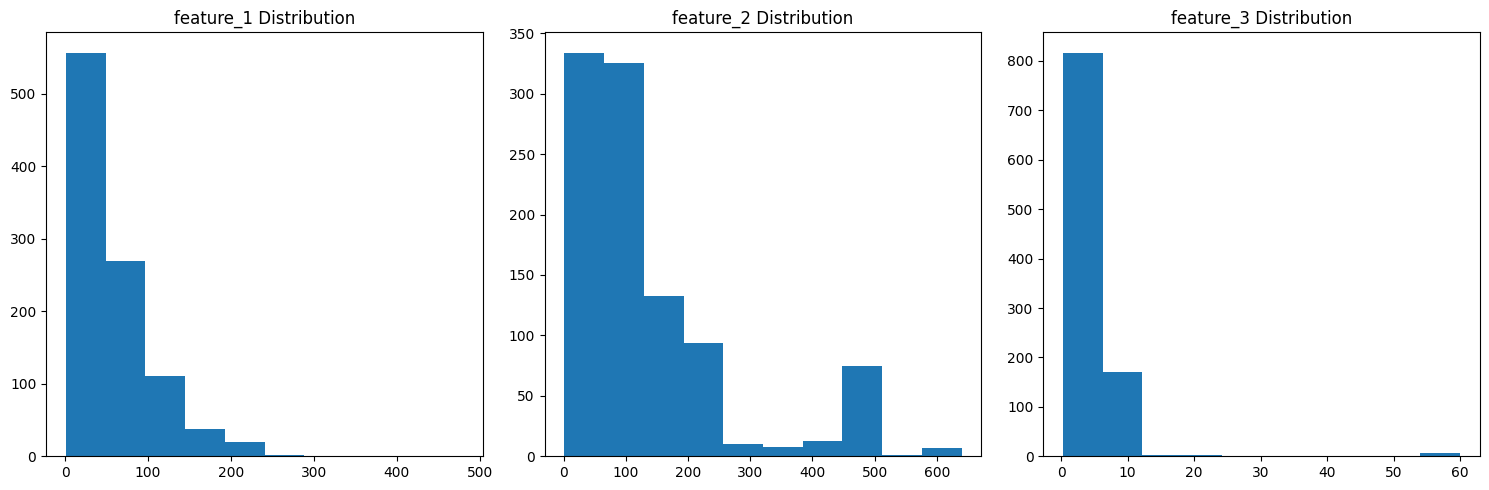

In [23]:
# 서브플롯 설정: 1행 3열
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(non_binary_columns):
    # 첫 번째 Feature의 분포
    axes[i].set_title(f'{feature} Distribution')
    axes[i].hist(train_data[feature], bins=10)

# 레이아웃 조정
plt.tight_layout()
plt.show()

여기까지 하면서 알게된것 

클래스 불균형 데이터이다 

feature는 많은데 행이 그리 많지 않는 데이터이다. 

대부분 바이너리 데이터이다. 

관계를 파악하고 차원을 줄여 중복컬럼데이터, 쓸모없는 컬럼을 제거하는데 집중해야할 것 같다. 

클래스 불균형 데이터이기 때문에 모델링할때, AUC, F1-score를 사용해야겠다.

## 데이터 값이 완전히 똑같은 컬럼은 제거한다.

In [26]:
train_data.shape

(1000, 1559)

In [27]:
train = train_data.T.drop_duplicates().T

train.shape
# 1559개의 컬럼에서 654개의 컬럼만 남았다.

(1000, 654)

3개의 수치형 데이터를 확인해본다.

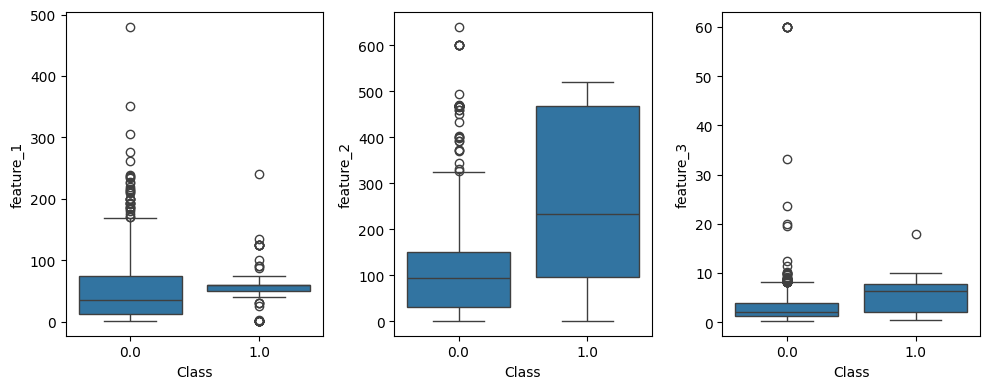

In [32]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x='Class', y='feature_1', data=train)

plt.subplot(1, 3, 2)
sns.boxplot(x='Class', y='feature_2', data=train)

plt.subplot(1, 3, 3)
sns.boxplot(x='Class', y='feature_3', data=train)

plt.tight_layout()
plt.show()

## 범주형 데이터에서 대부분의 값이 하나로 치우쳐져있으면 그 컬럼은 제거한다.

In [55]:
df = pd.DataFrame((train == 0).astype(int).sum(axis=0))

df

,0
feature_1,0
feature_2,0
feature_3,0
feature_4,267
feature_5,995
...,...
feature_1553,995
feature_1554,998
feature_1555,985
feature_1558,999


In [56]:
len(df)

654

In [57]:
all_zero = df[df[0]>950].index

print(len(all_zero))

631


In [58]:
train.drop(all_zero,axis=1,inplace=True)

In [59]:
train.shape

(1000, 23)

Feature를 23개까지 줄일 수 있다.